In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
#해당 변수값들을 설정하면 해당 시간의 oversupply를 출력한다.
YEAR = 2021
SEASON = 2   #   0 : spring     1 : summer    2 : fall    3 : winter
DAY = 0   # 0 : weekday       1 : weekend
season = ['spring','summer','fall','winter']
day = ['weekday','winter']

In [5]:
demand = pd.read_csv("한국전력거래소_시간별 제주 전력수요량_20211231.csv", encoding='CP949',index_col = '거래일자', dayfirst=False,parse_dates=True)

In [6]:
name = {}
for i in range(24):
    name['{}시'.format(i+1)] = i+1
    
demand = demand.rename(columns = name)

In [7]:
demand = demand.drop(demand.index[:5114])

In [8]:
demand

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
거래일자,,,,,,,,,,,,,,,,,,,,,
2021-01-01,746.329,710.544,685.313,674.663,673.663,681.400,697.155,711.220,712.511,680.729,...,677.561,706.211,746.329,793.037,811.248,799.623,779.496,750.644,735.134,731.775
2021-01-02,696.691,676.685,653.840,646.754,652.612,665.034,681.674,700.171,711.602,690.139,...,614.610,627.123,689.456,802.613,854.523,856.637,844.529,817.213,804.456,805.108
2021-01-03,761.605,721.750,699.323,689.283,689.539,699.503,716.947,724.572,707.432,626.458,...,606.953,645.027,716.579,805.433,845.691,837.328,811.747,771.693,755.239,751.093
2021-01-04,713.566,690.486,678.982,675.300,686.130,705.011,740.085,787.229,811.071,738.966,...,703.958,720.881,773.207,857.039,860.347,837.839,809.087,772.717,747.166,741.869
2021-01-05,705.262,671.701,653.466,658.218,662.119,675.042,693.165,721.399,797.511,850.131,...,773.714,781.230,816.094,902.904,912.425,891.405,862.185,819.901,799.307,800.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,795.565,766.598,745.062,731.373,734.156,750.933,785.346,839.692,921.427,928.443,...,854.699,876.264,919.317,971.357,967.330,943.942,904.943,854.130,831.539,817.607
2021-12-28,775.204,737.272,723.113,709.159,705.909,715.858,742.821,796.769,875.307,915.328,...,842.396,866.657,895.729,932.662,945.606,920.643,891.916,852.842,831.829,810.699
2021-12-29,759.632,721.621,694.682,677.916,676.162,690.471,720.439,774.759,863.323,879.813,...,744.514,769.111,834.212,910.393,923.483,909.364,884.106,849.510,829.506,816.749


In [9]:
renewable = pd.read_csv("한국전력거래소_시간별 육지 제주 태양광 및 풍력발전량_20220228.csv", \
                        encoding='CP949',index_col = 0 ,parse_dates=True)

In [20]:
#제주도 2021 태양광에너지 총 거래량(PPA,자가용 제외)
renewable.loc[(renewable.index>='2021-01-01')&(renewable.index<='2021-12-31'),['제주태양광 총발전량(MWh)']].sum()

제주태양광 총발전량(MWh)    357216.295566
dtype: float64

In [65]:
#ppa, 자가용 고려 -> 태양광*1.641688, 풍력의 경우 PPA, 자가용 거래량은 0
renewable['태양광+풍력'] = renewable['제주태양광 총발전량(MWh)']*1.641688 +renewable['제주풍력 총발전량(MWh)']#ppa, 자가용 고려 -> 태양광*1.641688
renewable = renewable.loc[renewable.index<='2021-12-31',['거래시간','태양광+풍력']]
a = renewable.sort_index().groupby(["거래시간"]).head(365)
final_renewable = a.pivot(columns = '거래시간', values = "태양광+풍력")

col={}
for i in range(24):
    col[i] = i+1

final_renewable = final_renewable.rename(columns = col)

In [66]:
demand = demand.set_index(final_renewable.index)

In [67]:
final_renewable.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='거래일', length=365, freq=None)

In [68]:
dm_2021 = demand + final_renewable

In [69]:
dm_2021

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
거래일,,,,,,,,,,,,,,,,,,,,,
2021-01-01,767.479634,830.183797,790.490519,780.857547,750.374836,746.571334,776.283469,758.886045,751.951435,726.915537,...,728.339690,758.180130,788.758771,824.915148,832.159173,836.342658,804.302159,770.412527,749.925155,755.240027
2021-01-02,832.587930,713.013370,708.686588,715.514550,711.839813,726.069536,767.443353,775.970025,776.304546,749.811081,...,787.010320,821.347593,892.330118,987.315275,1018.859702,1037.117684,1021.073552,961.749179,949.578065,933.981656
2021-01-03,803.147473,823.786940,795.429334,784.850850,774.931214,766.554483,824.754742,832.672982,796.462379,707.923546,...,856.477681,844.969491,876.104369,948.396472,953.828637,914.272930,894.702556,870.036070,817.809657,806.713272
2021-01-04,724.047439,729.540582,721.521423,721.307712,746.884423,764.294289,811.983808,836.480277,849.591174,790.178974,...,860.190590,837.537894,842.922412,889.157431,868.025394,856.366639,826.155109,783.788095,755.471121,748.595121
2021-01-05,810.891735,690.585539,667.720535,675.747149,697.357464,698.355973,734.984941,762.147148,863.858264,966.826928,...,1007.016978,1018.552051,1016.282297,1093.644308,1107.472016,1064.856228,1010.625215,962.152122,918.501350,910.618589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,873.302591,828.153553,795.389627,791.831379,786.785590,826.741956,848.089057,910.323480,1005.542049,1033.239161,...,1039.641170,1033.648390,1040.771394,1097.161756,1102.714112,1065.502593,1011.009961,926.653206,884.291860,862.199003
2021-12-28,811.447492,769.916008,756.948181,744.217693,740.317809,751.754365,774.311868,816.143949,903.656156,953.182722,...,877.524472,888.083075,910.119353,947.674132,978.305160,940.030772,902.840786,857.561714,834.669176,818.837538
2021-12-29,768.474931,731.576327,708.250784,696.212224,709.659684,729.881622,771.526893,821.566166,927.385893,972.170964,...,1006.732921,978.832510,989.541841,1044.004939,1074.861673,1069.830856,1044.864495,1004.623373,973.830972,953.659640


In [70]:
#연도별, 계절별, 주말/평일별 수요 Table 저장
#dm[year-2021][day][season]
dm = []
for year in range(2021,2035):
    final_dm = dm_2021 + dm_2021*((8141/5832)-1)*(year-2021)/13    #수요 증가 적용
    dm.append(
        [
            #weekday
            [
                final_dm[((final_dm.index>='2021-03-01')&(final_dm.index<'2021-06-01'))&(final_dm.index.dayofweek<5)],#spring
                final_dm[((final_dm.index>='2021-06-01')&(final_dm.index<'2021-09-01'))&(final_dm.index.dayofweek<5)],#summer
                final_dm[((final_dm.index>='2021-09-01')&(final_dm.index<'2021-12-01'))&(final_dm.index.dayofweek<5)],#fall
                final_dm[((final_dm.index<'2021-03-01')|('2021-11-30'<final_dm.index))&(final_dm.index.dayofweek<5)]#winter
            ],
            #weekend
            [
                final_dm[((final_dm.index>='2021-03-01')&(final_dm.index<'2021-06-01'))&(final_dm.index.dayofweek>4)],#spring
                final_dm[((final_dm.index>='2021-06-01')&(final_dm.index<'2021-09-01'))&(final_dm.index.dayofweek>4)],#summer
                final_dm[((final_dm.index>='2021-09-01')&(final_dm.index<'2021-12-01'))&(final_dm.index.dayofweek>4)],#fall
                final_dm[((final_dm.index<'2021-03-01')|('2021-11-30'<final_dm.index))&(final_dm.index.dayofweek>4)]#winter
            ]
        ]
    )

In [71]:
dm[0][0][1]#2021 summer weekday

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
거래일,,,,,,,,,,,,,,,,,,,,,
2021-06-01,585.000846,580.079525,580.109532,550.527603,536.489081,550.211114,561.300765,589.994521,632.859962,698.283045,...,785.029196,794.123908,813.306640,781.601479,735.212548,741.079099,728.790962,700.725017,656.181466,627.464053
2021-06-02,708.883915,559.139948,576.972055,563.207505,517.298184,547.165550,581.832801,602.142405,639.759410,687.206127,...,777.425522,797.876297,858.147551,838.216964,803.120395,812.645135,814.763153,804.956400,792.951863,754.408561
2021-06-03,742.920396,646.208673,636.125747,610.882754,582.283556,582.047560,640.777188,716.781901,754.596377,795.757864,...,816.778770,846.836196,772.348679,785.032968,778.025331,790.123233,766.500279,758.243409,794.401806,786.222169
2021-06-04,578.749572,698.543685,625.532620,588.509763,616.072383,632.539350,690.508996,732.408683,766.583601,733.740128,...,755.680578,803.208892,802.750005,782.709409,748.052722,729.237416,724.713773,702.409068,662.184882,625.889102
2021-06-07,583.510637,568.830079,538.587737,521.448337,519.085024,527.305388,538.866129,564.443692,617.488967,696.245925,...,792.824271,800.439638,796.758414,788.538905,773.687935,752.570264,737.721057,707.250241,666.018632,628.110643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,692.736398,663.383684,637.894282,602.308318,628.238816,684.687866,691.961784,759.765750,855.016883,948.372173,...,1072.153177,1057.133572,1053.276417,1025.937242,1009.417025,1017.020888,992.905654,915.262831,820.201055,766.790576
2021-08-26,666.815333,649.872776,630.147120,597.176169,588.030204,593.150431,610.235107,648.631716,739.213056,826.827251,...,958.617959,924.994064,1008.820114,973.418610,937.552985,932.344805,902.221842,839.071052,771.008232,725.952863
2021-08-27,720.923273,646.236411,634.669139,625.375172,613.436972,647.805097,692.234704,758.206559,834.229995,911.570982,...,1109.512084,1082.002061,1079.293323,1067.587606,1006.726124,980.532835,960.390672,898.560936,819.657238,787.794900


<AxesSubplot:title={'center':'2021 fall weekday demand graph'}, xlabel='Time'>

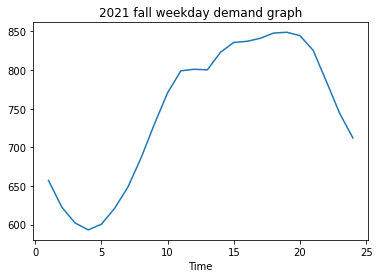

In [72]:
dm[YEAR-2021][DAY][SEASON].mean().plot(xlabel ='Time', title ='{} {} {} demand graph'.format(YEAR,season[SEASON],day[DAY]) )

In [73]:
supply = pd.read_csv("한국전력거래소_제주 연료원별 전력거래량_20220430.csv",encoding='CP949',index_col = 0, dayfirst=False, parse_dates=True)

In [74]:
sup_dict = {
    "biogas" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='바이오가스')],
    "solar" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='태양광')],
    "wind" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='풍력')],
    "small" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='소수력')],
    "land" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='매립가스')],
    "bunker" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='중유')],
    "waste" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='폐기물')],
    "lng" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='LNG')],
    "biobunker" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='바이오중유')],
    "ocean" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='해양에너지')],
    "biomass" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='바이오매스')],
    "diesel" : supply[(supply.index<='2021-12-31')&(supply['연료원']=='경유')]
}
sup_list = ['biogas','solar', 'wind', \
            'small', 'land', 'bunker', 'waste', 'lng', "biobunker", 'ocean', 'biomass', "diesel"]
# sup_index = 

# coal = hard_coal.add(soft_coal)
# coal['거래시간'] = (coal['거래시간']/2).astype(int)
# coal['연료원'] = 'coal'

In [75]:
for key in sup_dict.keys():
    temp = sup_dict[key].sort_index().groupby(["거래시간"]).head(365)
    sup_dict[key] = temp.pivot(columns = '거래시간', values = "전력거래량(MWh)")

In [76]:
sup_dict['biobunker']

거래시간,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
거래일,,,,,,,,,,,,,,,,,,,,,
2021-01-01,101.170048,101.179008,101.177216,101.183936,101.180576,101.182816,101.175200,101.176768,101.174752,101.183936,...,101.185952,101.186400,101.176544,101.222016,120.407392,120.811712,119.389984,101.681440,101.687712,101.691072
2021-01-02,101.691968,101.697344,101.699360,101.694432,101.690400,101.692416,101.693536,101.711008,101.898048,101.894464,...,100.230368,102.002208,101.996832,101.991456,101.988992,101.986304,101.986528,101.985856,101.982048,101.975776
2021-01-03,101.985856,101.985408,101.978912,101.978688,101.975104,101.966368,101.969504,101.970624,101.966816,101.961440,...,101.968832,101.964352,101.961664,125.263936,120.229312,101.166912,101.164000,101.162208,101.166016,101.166688
2021-01-04,101.161536,101.163328,101.165120,101.166016,101.164448,101.162880,101.157504,101.162656,101.162432,101.158176,...,101.365600,101.373888,112.484960,130.509568,122.903200,120.757056,120.781024,106.438304,100.795296,100.787904
2021-01-05,100.788352,100.778496,100.782976,100.782304,100.772224,100.774016,100.772224,100.772448,100.777376,101.522400,...,101.606400,101.606848,101.598560,101.591616,110.949440,111.938400,101.684576,101.684352,101.678080,101.684576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,206.078264,206.037720,205.995328,206.071824,206.020304,205.943528,213.672424,224.195664,226.879632,220.890096,...,185.996496,202.996136,223.985384,241.972192,208.427800,205.583056,205.468032,205.548448,205.709336,205.693488
2021-12-28,205.438912,205.056040,205.079056,205.126488,205.044728,205.011744,205.119936,204.863512,215.543608,243.141528,...,205.174928,205.237032,205.334640,209.710928,227.158848,211.666392,205.396296,205.515632,205.699928,200.160184
2021-12-29,186.425008,186.400368,186.425512,186.420920,186.333616,186.298336,186.384968,188.406064,204.861272,204.765624,...,205.062312,222.677952,249.910528,264.320056,224.852376,205.812600,205.465624,193.046952,186.531968,186.549664


In [86]:
sup_dict['solar']*=3 # 여기서 *3 은 (ppa + 자가용발전)의 예측값

In [77]:
#공급 증가율 적용
rate = {}
for key in sup_list:
    if key == 'solar':
        rate[key] = 624/412
    elif key == 'wind':
        rate[key] = 624/412
    else:
        rate[key] = 98/91

In [78]:
#공급 예측량 fin_sup[year-2021][day][season]
fin_sup=[]

for year in range(2021,2035):
    i = year-2021
    fin_sup.append([  [ [],[],[],[] ], [ [],[],[],[] ]  ])
    for key in sup_dict.keys(): 
        x = sup_dict[key] + sup_dict[key]*(rate[key]-1)*(year-2021)/14 #연도별 공급증가율 적용
        #weekday                
        fin_sup[i][0][0].append(x[((x.index>='2021-03-01')&(x.index<'2021-06-01'))&(x.index.dayofweek<5)].mean())#spring
        fin_sup[i][0][1].append(x[((x.index>='2021-06-01')&(x.index<'2021-09-01'))&(x.index.dayofweek<5)].mean())#summer
        fin_sup[i][0][2].append(x[((x.index>='2021-09-01')&(x.index<'2021-12-01'))&(x.index.dayofweek<5)].mean())#fall
        fin_sup[i][0][3].append(x[((x.index<'2021-03-01')|('2021-11-30'<x.index))&(x.index.dayofweek<5)].mean())#winter                
        #weekend                
        fin_sup[i][1][0].append(x[((x.index>='2021-03-01')&(x.index<'2021-06-01'))&(x.index.dayofweek>4)].mean())#spring
        fin_sup[i][1][1].append(x[((x.index>='2021-06-01')&(x.index<'2021-09-01'))&(x.index.dayofweek>4)].mean())#summer
        fin_sup[i][1][2].append(x[((x.index>='2021-09-01')&(x.index<'2021-12-01'))&(x.index.dayofweek>4)].mean())#fall
        fin_sup[i][1][3].append(x[((x.index<'2021-03-01')|('2021-11-30'<x.index))&(x.index.dayofweek>4)].mean())#winter
    

In [79]:
fin_sup[0][0][0][2]

거래시간
1     47.545854
2     45.518333
3     47.390313
4     50.492880
5     53.445704
6     61.795134
7     58.444708
8     56.674875
9     56.010476
10    61.194067
11    57.367441
12    49.985582
13    45.644699
14    47.850699
15    54.481867
16    57.283162
17    62.890086
18    60.384577
19    65.073501
20    71.091737
21    69.190971
22    66.934200
23    60.702452
24    56.894267
dtype: float64

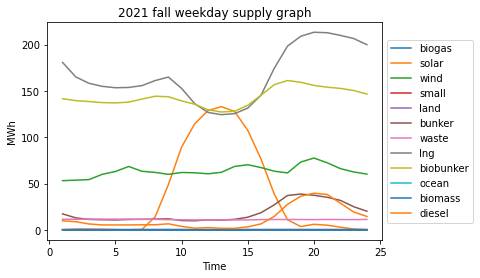

In [80]:
b = pd.DataFrame(fin_sup[YEAR-2021][DAY][SEASON])
g = b.T

sup_column = {}
for i, source in enumerate(sup_list):
    sup_column[i] = source

g = g.rename(columns = sup_column)
g.plot(xlabel = 'Time',ylabel = 'MWh',title = '{} {} {} supply graph'.format(YEAR,season[SEASON],day[DAY])).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [81]:
g

,biogas,solar,wind,small,land,bunker,waste,lng,biobunker,ocean,biomass,diesel
거래시간,,,,,,,,,,,,
1,0.184205,0.110044,53.179291,0.374279,0.319133,17.332033,11.548378,180.838376,141.658985,0.001551,0.0,9.801368
2,0.176837,0.849674,53.691226,0.374884,0.314150,13.021366,11.516687,165.180523,139.570315,0.001451,0.0,8.853579
3,0.172745,0.808434,54.326597,0.368622,0.314180,11.326412,11.648783,158.276639,138.593257,0.001196,0.0,6.424256
4,0.166824,0.670323,60.011513,0.366870,0.314188,11.010599,11.667092,155.000528,137.435542,0.001473,0.0,5.380146
5,0.168138,0.260893,63.072214,0.362372,0.314180,10.771157,11.650671,153.486155,137.112376,0.001662,0.0,5.378809
6,0.168506,0.123454,68.506123,0.357889,0.314179,11.244192,11.616958,153.793178,137.961791,0.001772,0.0,5.378450
7,0.168538,0.584523,63.301907,0.362379,0.314247,11.442876,11.427862,155.780521,141.228079,0.001938,0.0,5.517427
8,0.170550,14.181069,62.070056,0.390220,0.314241,11.674172,11.363446,161.223939,144.305221,0.001894,0.0,5.572064
9,0.182918,48.959668,60.018341,0.385629,0.313480,11.981958,11.060024,165.016115,143.784494,0.001894,0.0,6.595520


c:\Users\koder\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\koder\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\koder\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\koder\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\koder\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\koder\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47000 missing from cur

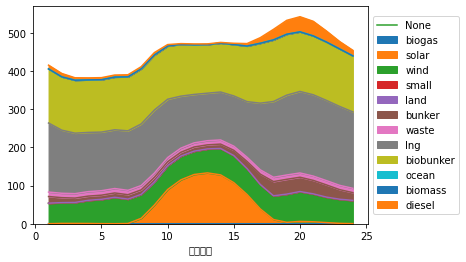

In [85]:
ax = g.plot.area()
dm[YEAR-2021][DAY][SEASON].mean().plot(ax = ax).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [20]:
#수요와 공급이 불일치한다. 공급이 더 적은 양으로 나타난다. 누락된 공급량 통계(HVDC)가 있을 것이라고 생각했다.
#이 누락된 공급에너지를 unknown으로 저장하였다.
#그리고 이 unknown 공급 에너지가 수요의 증가량만큼 늘어난다고 가정하여 각 년도에 더해주었다.


sup_sum_list = [[],[]]
for i in range(2):
    for j in range(4):
        sup_sum = fin_sup[0][i][j][0]
        for k in range(1,len(fin_sup[0][i][j])):
            sup_sum = sup_sum + fin_sup[0][i][j][k]
        sup_sum_list[i].append(sup_sum)

unknown_sup = [[],[]]
for i in range(2):
    for j in range(4):
        unknown_sup[i].append(dm[0][i][j].mean() - sup_sum_list[i][j])

In [21]:
for i in range(0,14):
    #weekday                
    fin_sup[i][0][0].insert(5,unknown_sup[0][0])#spring
    fin_sup[i][0][1].insert(5,unknown_sup[0][1])#summer
    fin_sup[i][0][2].insert(5,unknown_sup[0][2])#fall
    fin_sup[i][0][3].insert(5,unknown_sup[0][3])#winter                
    #weekend                
    fin_sup[i][1][0].insert(5,unknown_sup[1][0])#spring
    fin_sup[i][1][1].insert(5,unknown_sup[1][1])#summer
    fin_sup[i][1][2].insert(5,unknown_sup[1][2])#fall
    fin_sup[i][1][3].insert(5,unknown_sup[1][3])#winter           

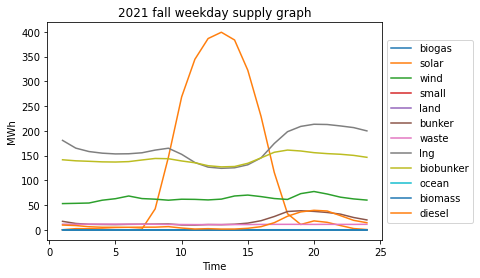

In [70]:
b = pd.DataFrame(fin_sup[YEAR-2021][DAY][SEASON])
g = b.T

sup_column = {}
for i, source in enumerate(sup_list):
    sup_column[i] = source

g = g.rename(columns = sup_column)
g.plot(xlabel = 'Time',ylabel = 'MWh',title = '{} {} {} supply graph'.format(YEAR,season[SEASON],day[DAY])).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Text(0, 0.5, 'Mwh')

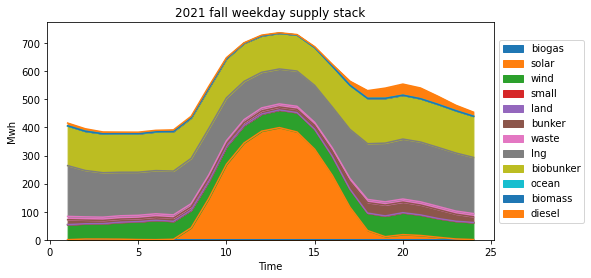

In [71]:
fig, axs = plt.subplots(figsize=(8, 4))  
g.plot.area(ax=axs, xlabel = 'Time',title= '{} {} {} supply stack'.format(YEAR,season[SEASON],day[DAY])).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
axs.set_ylabel("Mwh")

In [172]:
up_to_wind = fin_sup[YEAR-2021][DAY][SEASON][0]
for i in range(1,21):
    up_to_wind = up_to_wind + fin_sup[YEAR-2021][DAY][SEASON][i]

In [173]:
diff = dm[YEAR-2021][DAY][SEASON].mean()-up_to_wind

In [174]:
oversupply = 0
for i in diff:
    if i<0:
        oversupply -= i
print('oversupply=', oversupply)

oversupply= 1569840.501664444


In [175]:
 dm[YEAR-2021][DAY][SEASON].mean()

1     638.255309
2     605.310820
3     584.952769
4     575.922345
5     581.974981
6     601.604060
7     624.817313
8     656.999489
9     700.711921
10    750.836519
11    786.796624
12    792.080729
13    793.056413
14    812.770545
15    816.746852
16    805.778043
17    795.713104
18    795.539757
19    799.544515
20    799.311079
21    783.842351
22    749.641007
23    715.603880
24    687.458866
dtype: float64

In [176]:
up_to_wind

거래시간
1     57747.614120
2     55801.657752
3     54754.716869
4     54349.421886
5     54758.687185
6     56296.377690
7     59191.839108
8     63831.858849
9     70054.991416
10    72842.016391
11    72156.322752
12    71685.459461
13    69533.350691
14    72132.083016
15    73228.963246
16    73437.016264
17    73736.713256
18    73505.598520
19    73239.567887
20    72112.191034
21    69639.171628
22    66662.402395
23    63767.793179
24    62629.956359
dtype: float64

In [92]:
great = pd.DataFrame(dm[YEAR-2021][DAY][SEASON].mean())


In [102]:
great.column

AttributeError: 'DataFrame' object has no attribute 'column'